# DSI19 Project 2 - EDA notebook

## Table of Contents

* [1. Target Variable](#chapter1)
* [2. Correlation Analysis](#chapter2)
* [3. Pairplots](#chapter3)
* [4. Outliers](#chapter4)
* [5. Remaining Parameters with `Object` Type](#chapter5)
* [6. Export datasets for use in model](#chapter6)

In [1]:
# Import modules required
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

%config InLineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# Read in data sets
train_df = pd.read_csv('../datasets/train_ife.csv')
test_df = pd.read_csv('../datasets/test_ife.csv')
train_df.drop('Unnamed: 0',axis=1,inplace=True)
test_df.drop('Unnamed: 0',axis=1,inplace=True)

## 1. Target Variable <a class="anchor" id="chapter1"></a>

---
The target variable is Sale Price of the properties.

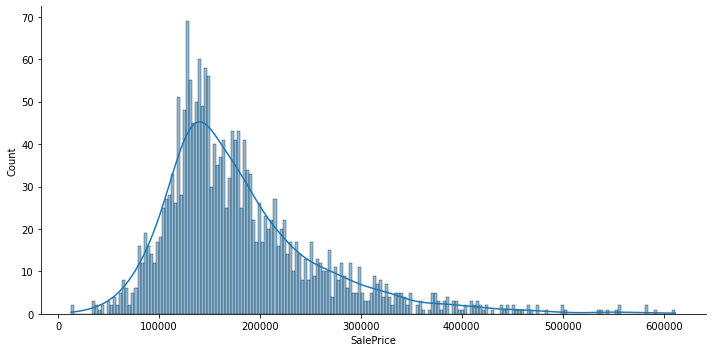

In [3]:
# Plotting distribution of target variable
sns.displot(x='SalePrice',data=train_df,bins=200,kde=True,aspect=2);

The Sale Price is observed to follow a normal distribution that is heavily skewed to the right. Further analysis will be used to identify if there are any outliers.

## 2.  Correlation Analysis <a class="anchor" id="chapter2"></a>
---

As the dataset includes a large number of parameters, a chart looking at the correlation of each parameter with the sale price will first be obtained before moving on to visualisation.

In [4]:
# Obtaining the correlation of each parameter with price in a descending manner
train_corr_df = pd.DataFrame(train_df._get_numeric_data().corrwith(train_df['SalePrice']).sort_values(ascending=False),columns=['price_corr'])
display(train_corr_df)

,price_corr
SalePrice,1.000000
Overall Qual,0.800207
built_in_SF,0.784633
Exter Qual,0.712146
Gr Liv Area,0.697038
Kitchen Qual,0.692336
neighborhood_score,0.689880
Bsmt Qual,0.682238
Garage Area,0.650246
Garage Cars,0.648197


We see that there are many parameters with positive correlation to sale price and will therefore be focusing on those parameters for more visualisation. While parameters with negative correlation are important as well, none of the parameters prove to have a meaningful enough negative correlation (smallest is -0.14).

We also observe that the initial features that we constructed in the [initial feature engineering](./02_initial_feature_engineering.ipynb) seem to have good correlation scores with sale price.
- built_in_SF : 0.78
- neighborhood_score: 0.69
- location_score: 0.73

For initial visualisation, a benchmark of greater than 0.4 correlation will be used.

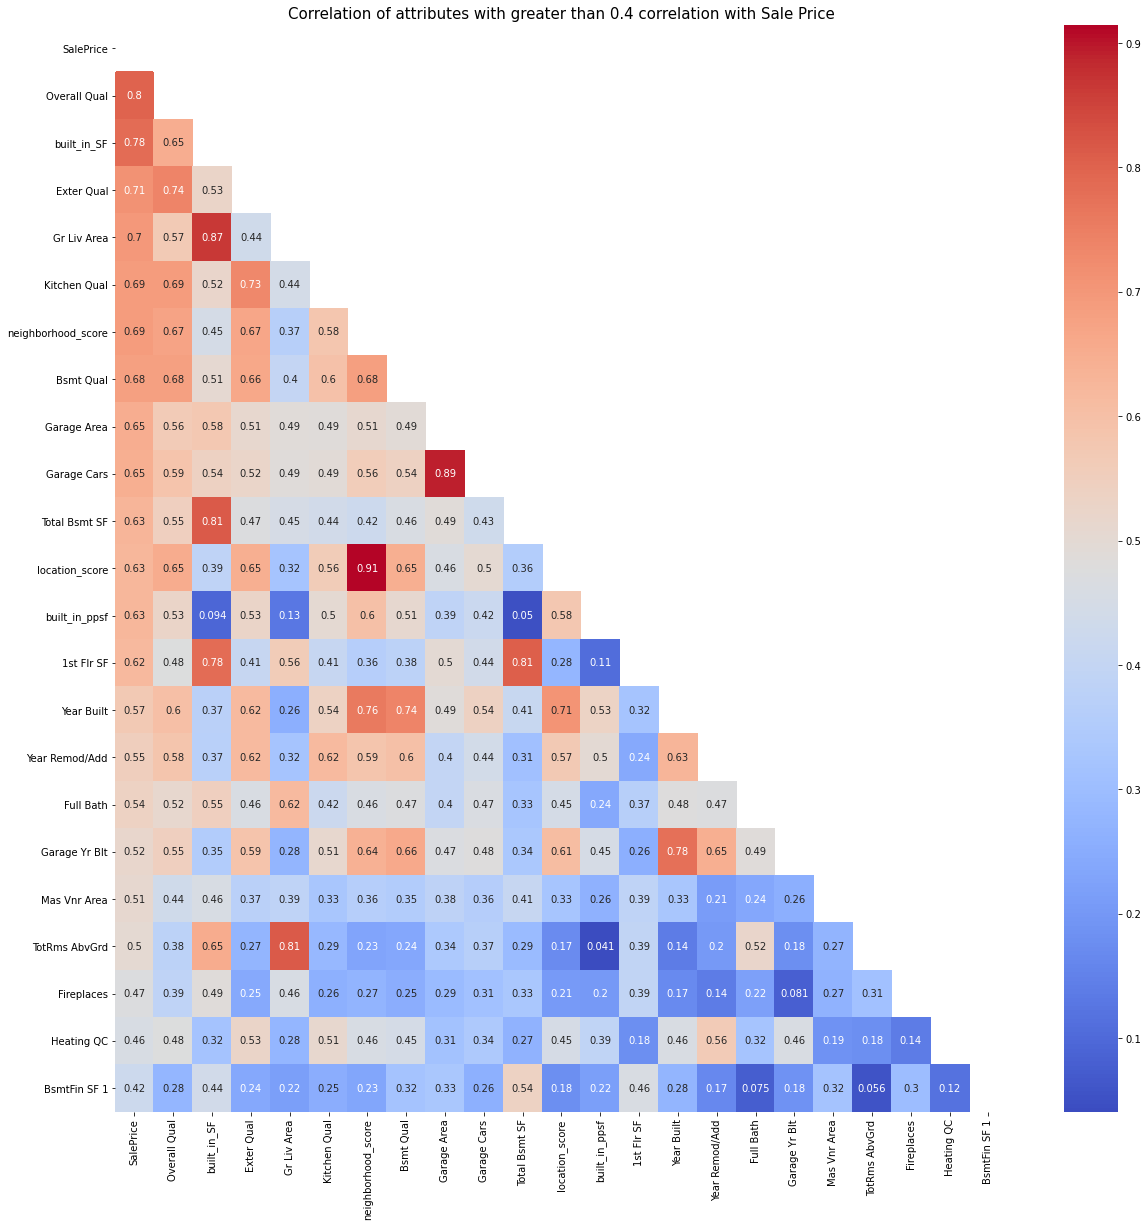

In [9]:
# Dataframe with attributes that have >0.4 correlation with Sale Price
corr_df = train_df[train_corr_df[train_corr_df['price_corr']>.4].index]

# Plot masked heatmap
plt.figure(figsize=(20,20))
plt.title("Correlation of attributes with greater than 0.4 correlation with Sale Price",size=15)
mask = np.triu(np.ones_like(corr_df.corr(), dtype=bool))
sns.heatmap(corr_df.corr(),
            annot=True,
            mask=mask,
            cmap='coolwarm');
plt.savefig("../images/correlation.png")

Observations from heatmap:
- `built-in-sf`, one of the engineered features which includes the total built-in area of the property has a higher correlation than `Gr Liv Area`, which represent living areas. 
- Overall quality of the house still holds the highest correlation, which is even higher than the location score. This suggests that quality in the build and finish of the house has a higher influence on price than the location of the property.
- Year built/remodeled also have relatively high correlations, which implies that the newer the house, the higher the sale price.
- There is relatively high correlation of 0.67 between the engineered neighbourhood score and the overall quality, which suggests that properties in more affluent neighorhoods have a better quality score.
- While the overall quality has the highest correlation of 0.80, the next highest quality scores are external quality at 0.71, kitchen quality of 0.69, and basement quality of 0.68. This seems to suggest that buyers place emphasis first on the external finish of the house, followed by the finish of the kitchen and finally the quality of the basement.

In [7]:
train_df[train_df.columns].corr()['Overall Qual'].sort_values()

Kitchen AbvGr        -0.170964
Enclosed Porch       -0.154554
Overall Cond         -0.082770
Id                   -0.061483
Low Qual Fin SF      -0.052338
Bsmt Half Bath       -0.047286
BsmtFin SF 2         -0.028184
Yr Sold              -0.011578
Pool Area             0.006558
Mo Sold               0.019242
Exter Cond            0.020425
Misc Val              0.022099
3Ssn Porch            0.031938
MS SubClass           0.035763
Screen Porch          0.048752
Bedroom AbvGr         0.053373
MS Zoning_score       0.096488
Lot Area              0.105824
Garage Cond           0.158476
Bsmt Full Bath        0.175051
Lot Frontage          0.178965
Bsmt Cond             0.183762
access                0.186020
Garage Qual           0.190854
2nd Flr SF            0.228152
Wood Deck SF          0.257081
Half Bath             0.274859
Bsmt Unf SF           0.275625
BsmtFin SF 1          0.278593
Open Porch SF         0.308855
TotRms AbvGrd         0.382025
Fireplaces            0.388920
land_pps

## 3. Pairplots <a class="anchor" id="chapter3"></a>
---

To understand the data further, pairplot will be used to have a quick look at the shape of the distributions. As there are many parameters, the plot will look at parameters with a greater than 0.65 correlation with `SalePrice`.

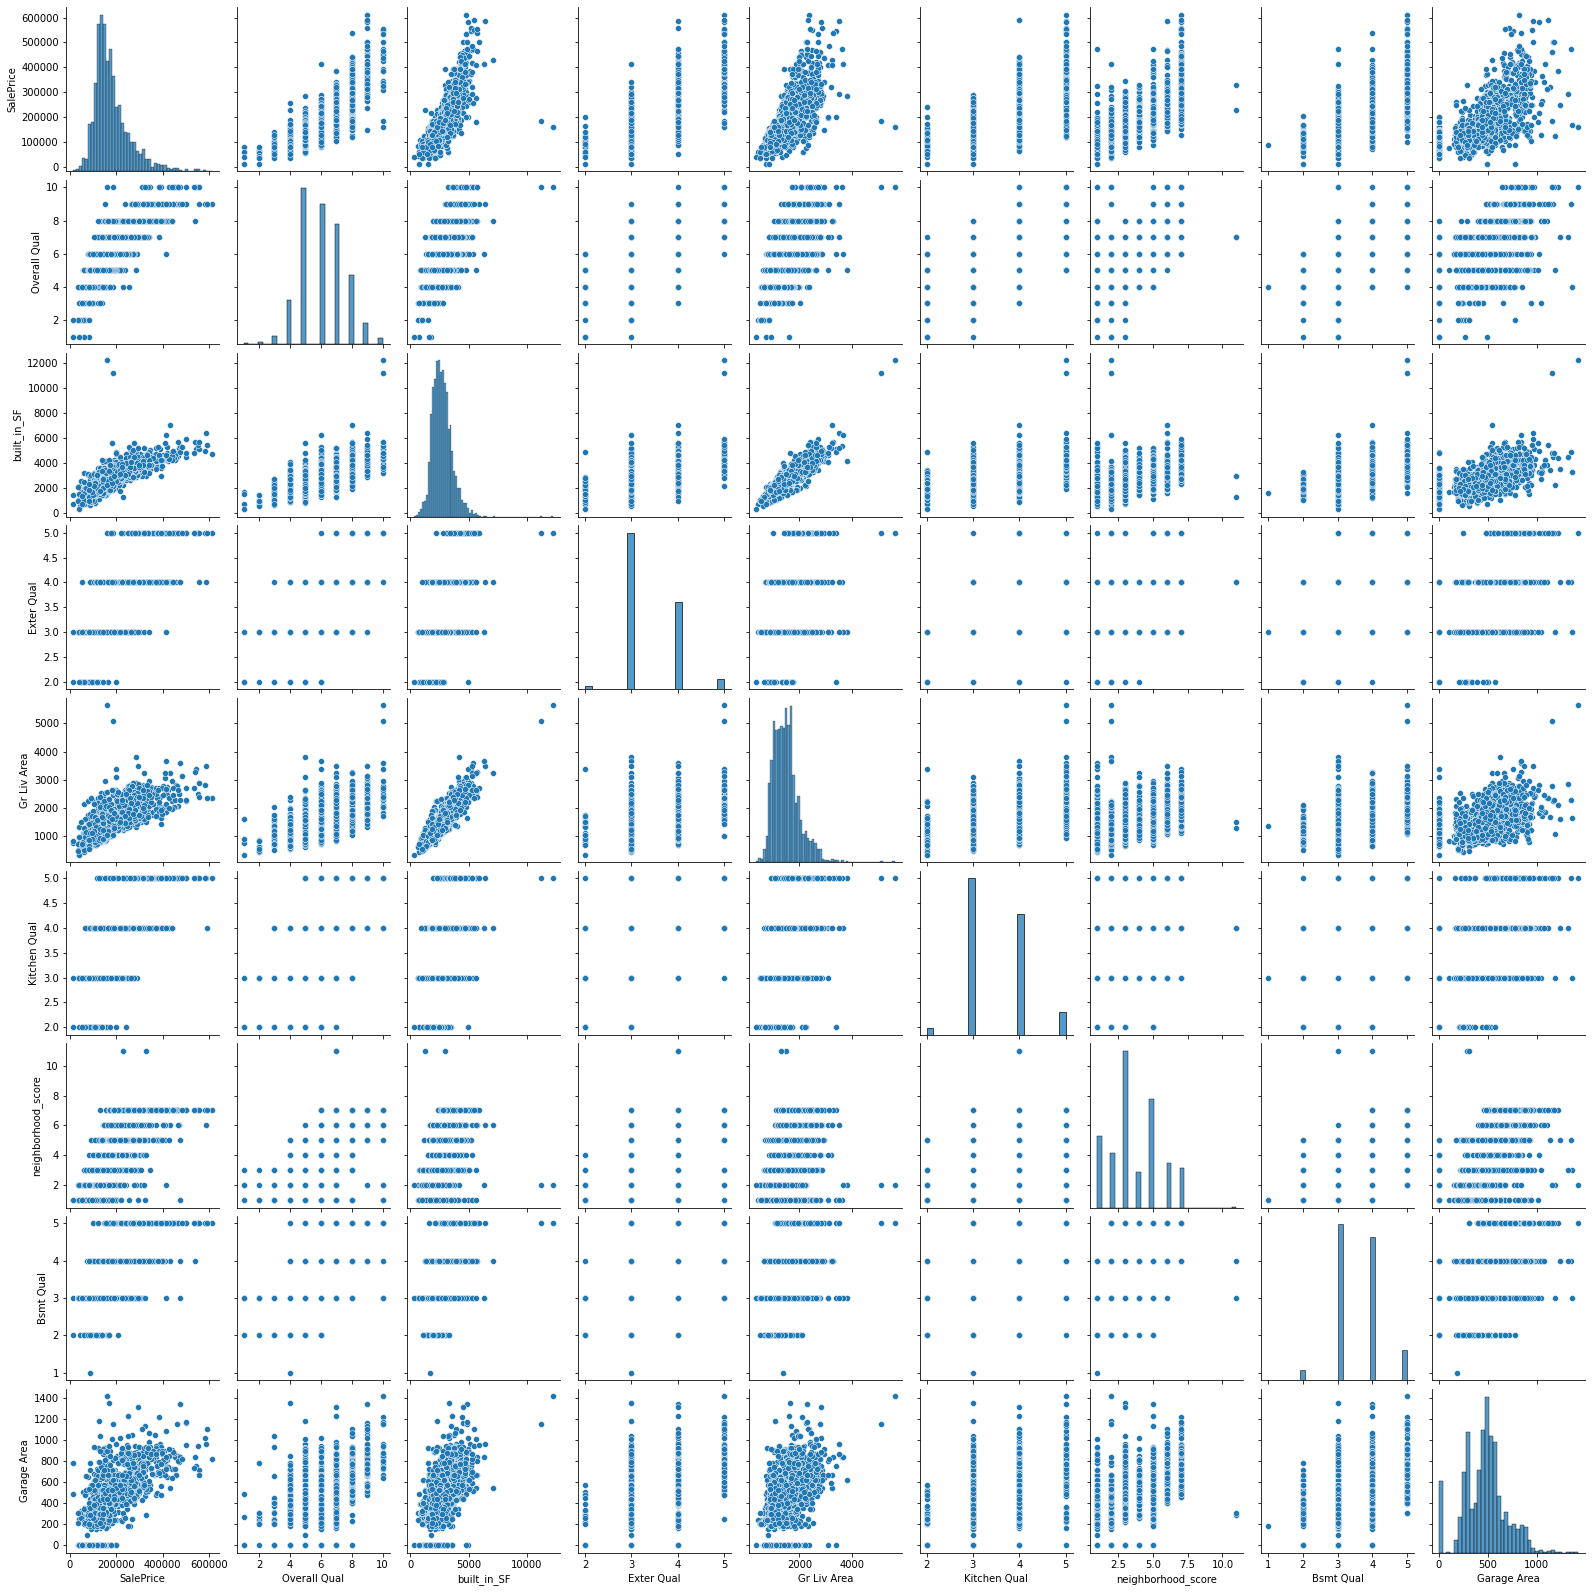

In [8]:
# Paitplot for parameters with >0.65 correlation with SalePrice
sns.pairplot(train_df[train_corr_df[train_corr_df['price_corr']>.65].index],);

Observations from pairplot:
- Sale Price seems to follow a normal distribution that is skewed to the right
- Several plot reveal certain outliers, especially present when looking at `built_in_SF` vs `SalePrice`
- Most of the distributions observed are mostly normally distributed with a right skew

## 4. Outliers <a class="anchor" id="chapter4"></a>
---

Initial visualisations revealed certain outliers in the data. Further visualisations will be used to identify these outliers and evaluate the necessity to remove them.

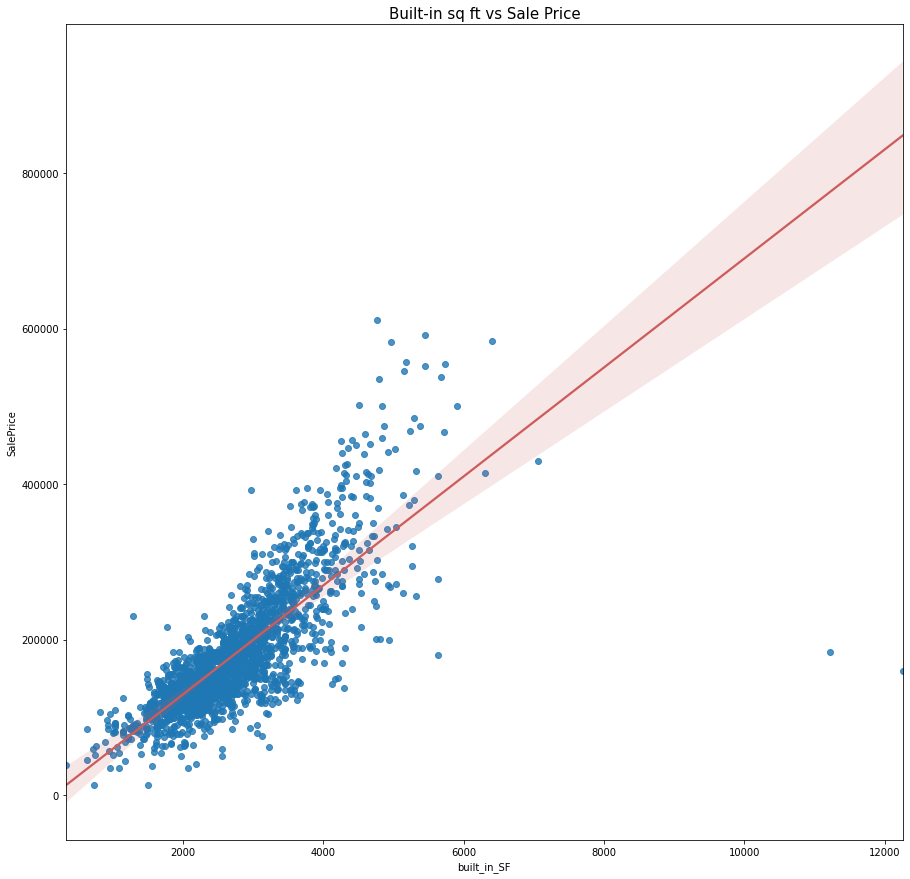

In [9]:
# Plotting built-in sq ft vs sale price
plt.figure(figsize=(15,15))
plt.title("Built-in sq ft vs Sale Price",size=15)
sns.regplot(x='built_in_SF',
            y='SalePrice',
            data=train_df,
            line_kws={'color':'indianred'});

In [10]:
# Investigating details of outliers
display(train_df[train_df['built_in_SF'] > 8000].filter(items=['built_in_SF','built_in_ppsf','SalePrice','Sale Type','Neighborhood','Year Remod/Add']))

,built_in_SF,built_in_ppsf,SalePrice,Sale Type,Neighborhood,Year Remod/Add
960,12258.0,13.052700,160000,New,Edwards,2008
1885,11220.0,16.385918,183850,New,Edwards,2009


In [11]:
# Investigating overall statistics for the 'Edwards' neighborhood
display(train_df[train_df['Neighborhood'] == 'Edwards'].describe().filter(items=['built_in_SF','built_in_ppsf','SalePrice']))

,built_in_SF,built_in_ppsf,SalePrice
count,143.000000,143.000000,143.000000
mean,2380.496503,58.689823,130493.468531
std,1318.382406,18.306821,51123.818503
min,640.000000,13.052700,35000.000000
25%,1796.000000,46.867678,101000.000000
50%,2233.000000,56.438127,125000.000000
75%,2642.000000,67.674132,142500.000000
max,12258.000000,132.656250,415000.000000


These 2 data points seem to be classified as 'New' which are homes that have just been constructed and sold. When compared to the rest of the sales in the neighborhood, the built-in price per sq ft significantly defers from the mean (more than 3 std dev away). Given these results, the outliers will be removed as excluding them will help further focus the model.

In [12]:
# Dropping identified outliers
train_df.drop([960,1885],axis=0,inplace=True)

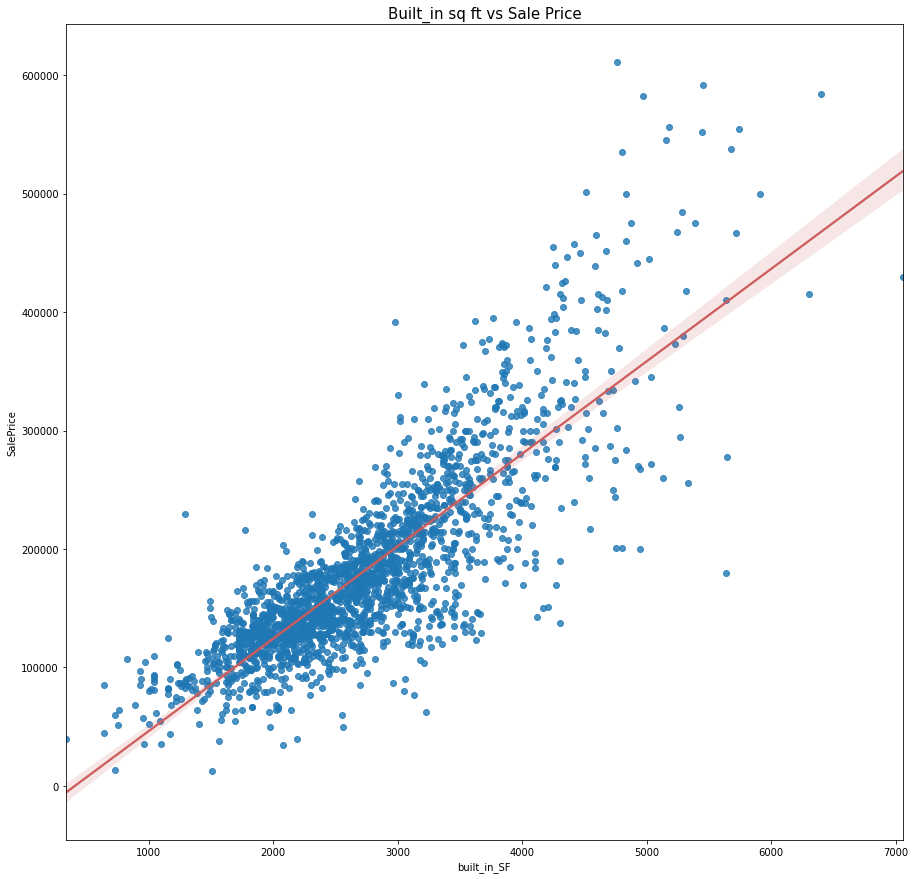

In [13]:
# Replotting built-in sq ft vs Sale Price
plt.figure(figsize=(15,15))
plt.title("Built_in sq ft vs Sale Price",size=15)
sns.regplot(x='built_in_SF',
            y='SalePrice',
            data=train_df,
            line_kws={'color':'indianred'});

Replotting the scatter between built-in sq ft and sale price after moving the outliers shows a linear regression line that is less wide with less noise.

## 5. Remaining Parameters with `Object` Type <a class="anchor" id="chapter5"></a>
---

Some of the 'object' parameters were previously used to engineer some features in [initial feature engineering](./02_initial_feature_engineering.ipynb).

- MS Zoning: 'MS Zoning_score' was created which is a factor in the 'location_score' feature
- Neighborhood: 'neighborhood_score' was created which is a factor in the 'location_score' feature
- Condition 1 and Condition 2: 'access' was created which is a factor in the 'location_score' feature

For the remaining parameters, OneHotEncoder will be applied to use the parameters in the model.

In [14]:
# Obtain object columns that OneHotEncoder will be applied on
ohe_params = train_df.select_dtypes(include='object').columns.drop(['MS Zoning','Neighborhood','Condition 1','Condition 2'])

In [15]:
# Instantiate OneHotEncoder
ohe = OneHotEncoder(sparse=False)

# Transform columns in ohe_params
for param in ohe_params:
    train_df[param] = ohe.fit_transform(train_df[[param]])
    
for param in ohe_params:
    test_df[param] = ohe.fit_transform(test_df[[param]])

In [16]:
# Dropping object parameters that were previously used to engineer features.
train_df.drop(['MS Zoning', 'Neighborhood', 'Condition 1', 'Condition 2', 'built_in_ppsf', 'land_ppsf'],axis=1,inplace=True)
test_df.drop(['MS Zoning', 'Neighborhood', 'Condition 1', 'Condition 2'],axis=1,inplace=True)

In [39]:
ohe_params_df = train_df.filter(ohe_params).join(train_df['SalePrice'])

In [43]:
print(ohe_params_df.corr()['SalePrice'].sort_values(ascending=False))

SalePrice         1.000000
Garage Finish     0.423776
Lot Shape         0.273630
Bsmt Exposure     0.126425
Bldg Type         0.105771
Heating           0.094045
Utilities         0.033087
BsmtFin Type 2    0.011787
Roof Style        0.010215
Lot Config       -0.004499
Functional       -0.017788
Garage Type      -0.029648
Mas Vnr Type     -0.037257
Land Slope       -0.062580
Street           -0.069850
Roof Matl        -0.071652
BsmtFin Type 1   -0.088166
Land Contour     -0.098756
Sale Type        -0.107625
Exterior 2nd     -0.110420
Exterior 1st     -0.126359
House Style      -0.195858
Electrical       -0.201249
Foundation       -0.229950
Paved Drive      -0.273661
Central Air      -0.277425
Name: SalePrice, dtype: float64


Looking at the coefficients of the `object` parameters, there are no parameters with a significant positive or negative correlation that could lead to a increase or decrease in the Sale Price.

## 6. Export datasets for use in model <a class="anchor" id="chapter6"></a>
---

In [20]:
# Testing that all columns in train and test dataset are the same
print(all(train_df.columns.sort_values().drop('SalePrice') == test_df.columns.sort_values()))

True


In [21]:
train_df.to_csv('../datasets/train_model.csv')
test_df.to_csv('../datasets/test_model.csv')